In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#Ques-1

In [35]:
dataset_path = "Mall_Customers.csv"
df = pd.read_csv(dataset_path)
features = df[["CustomerID", "Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

#Ques-2

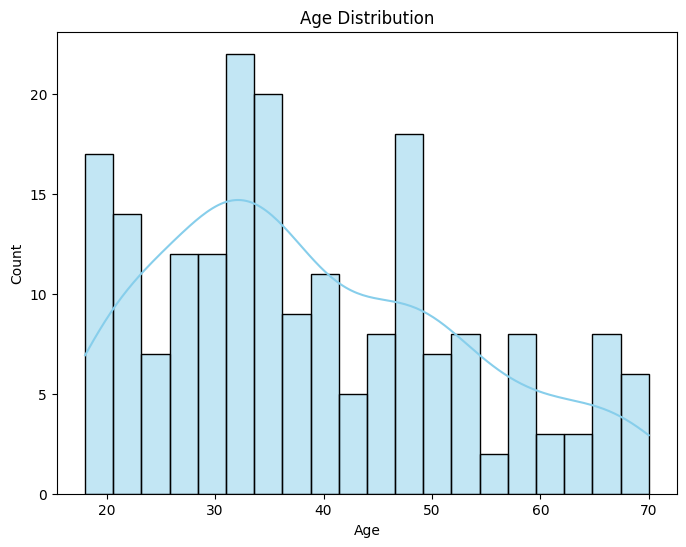

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


#Ques-3

<ipython-input-37-9893044cab2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


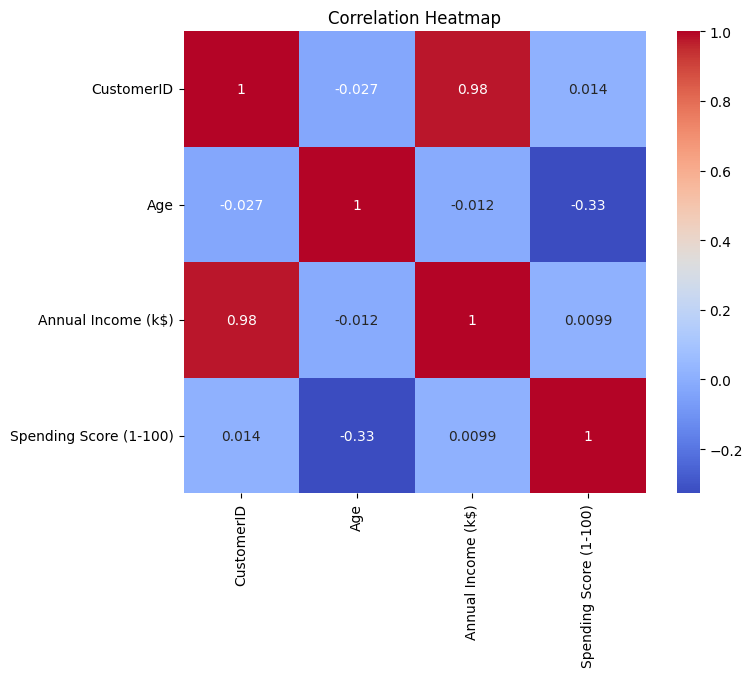

In [37]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


#Ques-4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

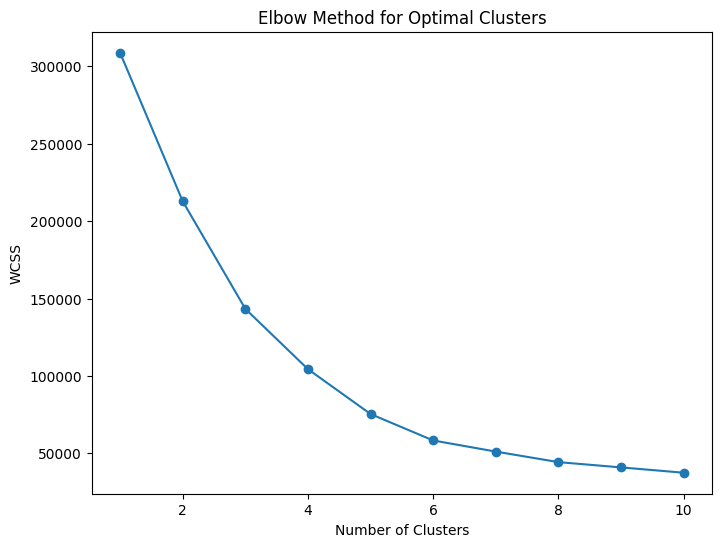

In [38]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


#Ques 5

In [39]:
avg_income = df["Annual Income (k$)"].mean()
print("Average Annual Income:", avg_income)


Average Annual Income: 60.56


#Ques-6

In [40]:
avg_spending_male = df[df["Gender"] == "Male"]["Spending Score (1-100)"].mean()
print("Average Spending Score (Male):", avg_spending_male)

Average Spending Score (Male): 48.51136363636363


#Ques-7

In [41]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Ques-8

In [42]:

cluster1_percentage = (df["Cluster"] == 1).sum() / len(df) * 100
print("Percentage of Customers in Cluster 1:", cluster1_percentage)

Percentage of Customers in Cluster 1: 19.5


#Ques-9

In [43]:
cluster2_age_group = df[df["Cluster"] == 2]["Age"].mode().values[0]
print(f"Most Frequent Age Group in Cluster 2: ",cluster2_age_group)

Most Frequent Age Group in Cluster 2:  34


#Ques-10

In [44]:
avg_income_cluster3 = df[df["Cluster"] == 3]["Annual Income (k$)"].mean()
print(f"Average Income (Cluster 3):" ,avg_income_cluster3)

Average Income (Cluster 3): 54.822784810126585


#Ques-11

In [45]:
cluster_counts = df["Cluster"].value_counts()
print("Count of Values in Each Cluster:")
print(cluster_counts)

Count of Values in Each Cluster:
3    79
1    39
2    37
0    23
4    22
Name: Cluster, dtype: int64


#Ques-12

In [46]:
print("Customers from Each Cluster:")
print(df[["CustomerID", "Cluster"]].head())


Customers from Each Cluster:
   CustomerID  Cluster
0           1        0
1           2        4
2           3        0
3           4        4
4           5        0


#Ques-13

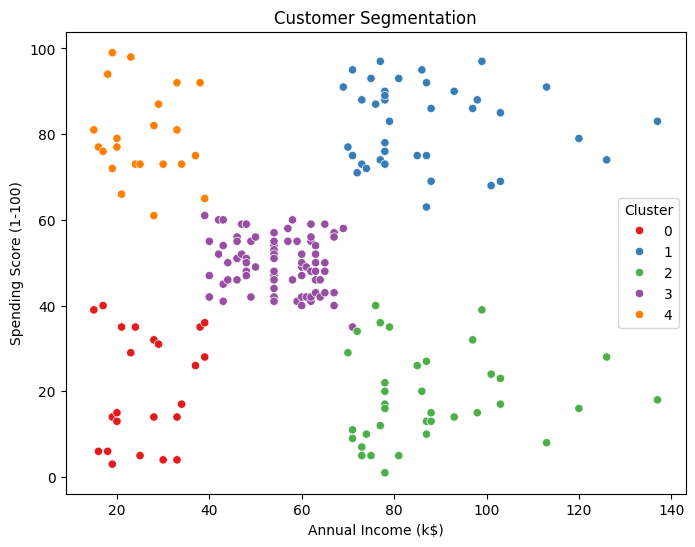

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=df, palette="Set1")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

#Ques-14

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Count of Values in Each Cluster (with selected features):
1    123
2     39
0     38
Name: Cluster, dtype: int64

Cluster 0 Customers:
     Age  Annual Income (k$)  Spending Score (1-100)
124   23                  70                      29
126   43                  71                      35
128   59                  71                      11
130   47                  71                       9
132   25                  72                      34

Cluster 1 Customers:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

Cluster 2 Customers:
     Age  Annual Income (k$)  Spending Score (1-100)
123   39                  69                      91
125   31                  70                      77
127   40                  71          

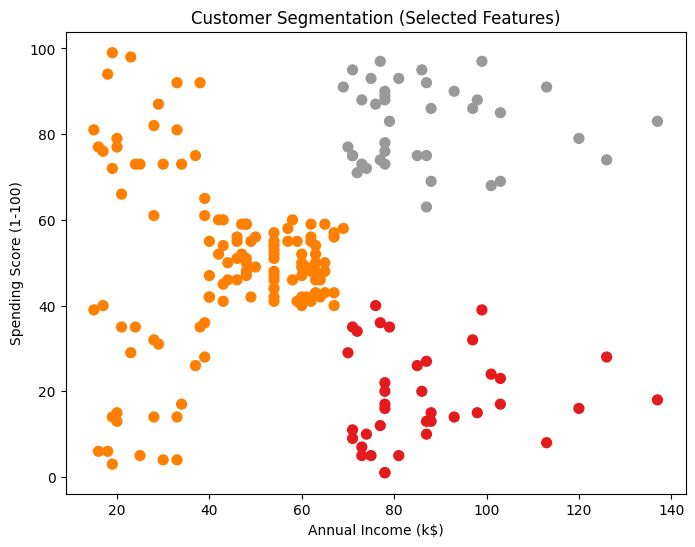

In [51]:
#selected 3 features value of k=3:
selected_features = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(selected_features)
cluster_counts_selected = df["Cluster"].value_counts()
print("Count of Values in Each Cluster (with selected features):")
print(cluster_counts_selected)
for cluster_label in range(df["Cluster"].nunique()):
    print(f"\nCluster {cluster_label} Customers:")
    print(df[df["Cluster"] == cluster_label][[ "Age", "Annual Income (k$)", "Spending Score (1-100)"]].head())
plt.figure(figsize=(8, 6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="Set1", s=50)
plt.title("Customer Segmentation (Selected Features)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()
